In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
import tensorflow as tf
import keras.backend as K

In [3]:
start = '2019-01-01'
end = '2023-12-31'

df = yf.download('TSLA', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400
2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900
2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300


In [5]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
1,2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2,2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
3,2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
4,2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


In [6]:
df = df.drop(['Date','Adj Close'], axis=1)

In [7]:
df.head()

,Open,High,Low,Close,Volume
0,20.406668,21.008667,19.920000,20.674667,174879000
1,20.466667,20.626667,19.825333,20.024000,104478000
2,20.400000,21.200001,20.181999,21.179333,110911500
3,21.448000,22.449333,21.183332,22.330667,113268000
4,22.797333,22.934000,21.801332,22.356667,105127500


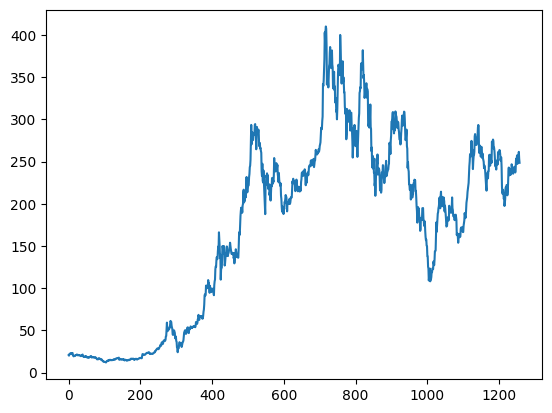

In [8]:
plt.plot(df.Close)

In [9]:
df

,Open,High,Low,Close,Volume
0,20.406668,21.008667,19.920000,20.674667,174879000
1,20.466667,20.626667,19.825333,20.024000,104478000
2,20.400000,21.200001,20.181999,21.179333,110911500
3,21.448000,22.449333,21.183332,22.330667,113268000
4,22.797333,22.934000,21.801332,22.356667,105127500
...,...,...,...,...,...
1253,256.760010,258.220001,251.369995,252.539993,93249800
1254,254.490005,257.970001,252.910004,256.609985,86892400
1255,258.350006,263.339996,257.519989,261.440002,106494400
1256,263.660004,265.130005,252.710007,253.179993,113619900


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1253    241.505100
1254    241.477999
1255    241.553799
1256    241.571099
1257    241.558899
Name: Close, Length: 1258, dtype: float64

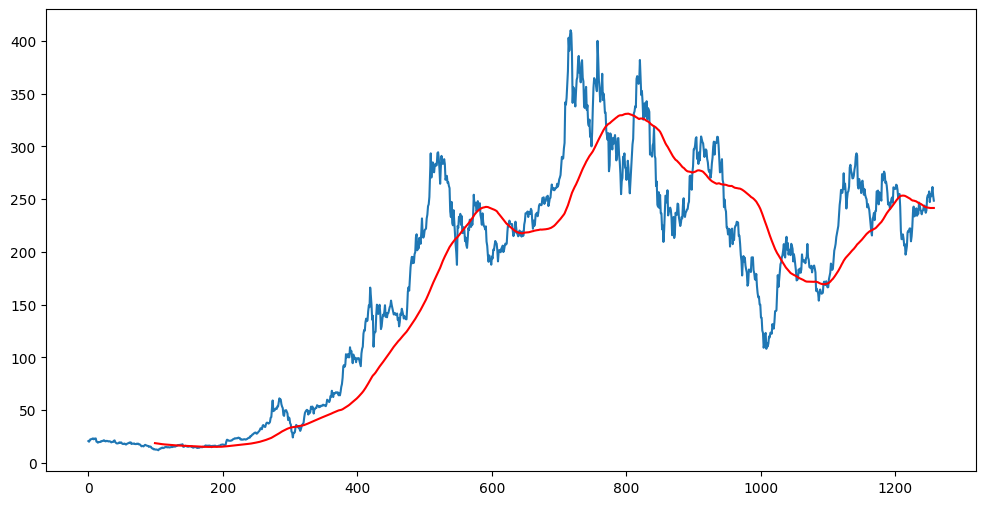

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1253    227.70775
1254    228.12360
1255    228.55840
1256    228.90800
1257    229.24815
Name: Close, Length: 1258, dtype: float64

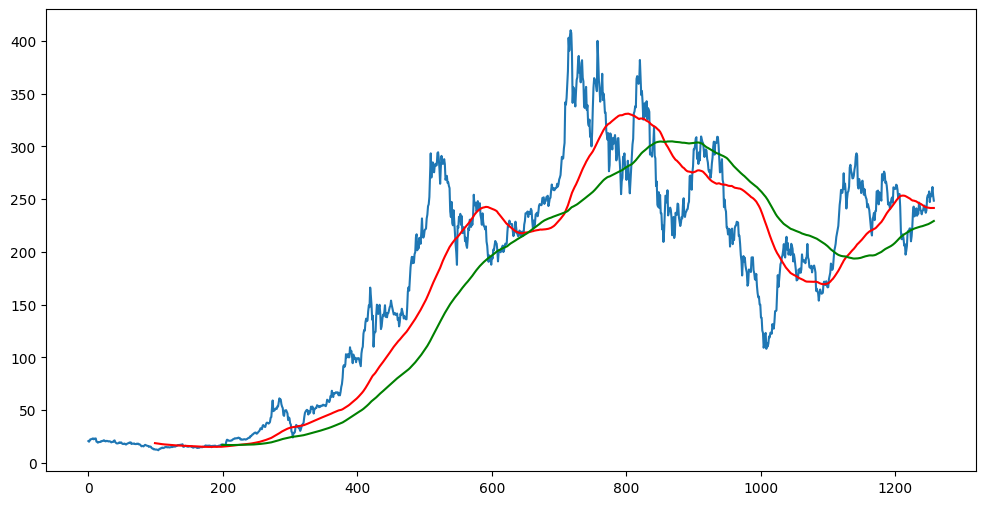

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [14]:
df.shape

(1258, 5)

In [15]:
# Splitting Data into training and testing

data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_train.shape)
print(data_test.shape)

(880, 1)
(378, 1)


In [16]:
data_train.head()

,Close
0,20.674667
1,20.024000
2,21.179333
3,22.330667
4,22.356667


In [17]:
data_test.head()

,Close
880,224.473328
881,227.263336
882,233.066666
883,231.733337
884,244.543335


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.02196604],
       [0.02033136],
       [0.02323392],
       [0.02612644],
       [0.02619176],
       [0.02672437],
       [0.02780299],
       [0.02818654],
       [0.02603265],
       [0.02771255],
       [0.02798388],
       [0.02819492],
       [0.02064959],
       [0.02009018],
       [0.01819254],
       [0.01884909],
       [0.0197753 ],
       [0.01966476],
       [0.01984565],
       [0.02173993],
       [0.02144683],
       [0.02231609],
       [0.02242998],
       [0.02384693],
       [0.02315521],
       [0.0215289 ],
       [0.0212425 ],
       [0.02242161],
       [0.02224909],
       [0.02163944],
       [0.02090249],
       [0.02159087],
       [0.02121569],
       [0.02069984],
       [0.01880219],
       [0.01938505],
       [0.02006505],
       [0.01991264],
       [0.02273984],
       [0.02360072],
       [0.01939845],
       [0.01781904],
       [0.0163418 ],
       [0.01629155],
       [0.01635017],
       [0.01761471],
       [0.01875027],
       [0.017

In [20]:
data_train_array.shape

(880, 1)

In [21]:
x_train = []
y_train = []

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i])
    y_train.append(data_train_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(780, 100, 1)

In [23]:
# ML Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units =60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units =80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units =120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 219ms/step - loss: 0.1381
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.0236
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - loss: 0.0129
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - loss: 0.0113
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - loss: 0.0095
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - loss: 0.0100
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - loss: 0.0086
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - loss: 0.0115
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - loss: 0.0102
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - loss: 0.0081
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - loss: 0.0086
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 241ms/step - loss: 0.0081
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - loss: 0.0129
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - loss: 0.0096
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - l

In [27]:
model.save('keras_model.h5')

In [28]:
data_test.head()

,Close
880,224.473328
881,227.263336
882,233.066666
883,231.733337
884,244.543335


In [29]:
data_train.tail(100)

,Close
780,307.773346
781,302.446655
782,307.333344
783,310.666656
784,301.516663
...,...
875,235.070007
876,245.706665
877,244.919998
878,232.663330


In [30]:
past_100_days = data_train.tail(100)

In [33]:
final_df= past_100_days._append(data_test, ignore_index=True)

In [34]:
final_df.head()

,Close
0,307.773346
1,302.446655
2,307.333344
3,310.666656
4,301.516663


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.72948914],
       [0.71002854],
       [0.72788163],
       [0.7400596 ],
       [0.70663089],
       [0.65237769],
       [0.67157037],
       [0.7284052 ],
       [0.72957432],
       [0.67228884],
       [0.64869998],
       [0.60552876],
       [0.53551721],
       [0.58024721],
       [0.5913292 ],
       [0.66507946],
       [0.65769949],
       [0.67659984],
       [0.62715702],
       [0.62593917],
       [0.584887  ],
       [0.60902386],
       [0.65112339],
       [0.62595133],
       [0.57364669],
       [0.53835472],
       [0.58161111],
       [0.62830172],
       [0.66650423],
       [0.70765385],
       [0.72685868],
       [0.81553912],
       [0.82178653],
       [0.83982214],
       [0.83582778],
       [0.93471342],
       [0.94412714],
       [0.93733173],
       [0.91737198],
       [0.92588438],
       [1.        ],
       [0.93400711],
       [0.87859706],
       [0.89260184],
       [0.8539121 ],
       [0.79355777],
       [0.80697799],
       [0.850

In [36]:
input_data.shape

(478, 1)

In [37]:
x_test =[]
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])
    

In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 100, 1)
(378,)


In [40]:
#Making predictions

y_predicted = model.predict(x_test)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step


In [41]:
y_predicted.shape

(378, 1)

In [42]:
y_test

array([0.4251598 , 0.43535285, 0.45655481, 0.45168361, 0.49848382,
       0.52120805, 0.46121902, 0.45656702, 0.47107101, 0.47572307,
       0.4821287 , 0.48388232, 0.50208851, 0.50928573, 0.59772267,
       0.59968339, 0.58576379, 0.55078845, 0.609097  , 0.6313097 ,
       0.69067765, 0.69114046, 0.70323325, 0.72811298, 0.73263102,
       0.65787008, 0.66610241, 0.64019973, 0.68047245, 0.65224379,
       0.7011995 , 0.73513973, 0.72506843, 0.7156914 , 0.71157518,
       0.68891182, 0.66423913, 0.68813248, 0.69048287, 0.68673201,
       0.65757774, 0.64563112, 0.61961884, 0.61198311, 0.61764597,
       0.5922547 , 0.60763565, 0.64153932, 0.66185228, 0.69992078,
       0.71723803, 0.67233756, 0.71062525, 0.7147902 , 0.71332885,
       0.73422638, 0.73298423, 0.70401259, 0.65940445, 0.61096016,
       0.61344457, 0.63876269, 0.65655479, 0.58494788, 0.57413381,
       0.49065331, 0.51637336, 0.48484439, 0.47505327, 0.42003289,
       0.41963101, 0.39602994, 0.39873349, 0.41510076, 0.35397

In [43]:
y_predicted

array([[0.47129834],
       [0.4761071 ],
       [0.4786902 ],
       [0.47936305],
       [0.478677  ],
       [0.4781657 ],
       [0.4794972 ],
       [0.48221907],
       [0.4853066 ],
       [0.48816478],
       [0.49056885],
       [0.49260038],
       [0.494416  ],
       [0.49650067],
       [0.49932346],
       [0.50500274],
       [0.51486206],
       [0.5285442 ],
       [0.54372156],
       [0.559464  ],
       [0.5755446 ],
       [0.5929802 ],
       [0.61204743],
       [0.6322459 ],
       [0.6529832 ],
       [0.67332435],
       [0.690151  ],
       [0.7015604 ],
       [0.70630383],
       [0.7055861 ],
       [0.7005029 ],
       [0.6935936 ],
       [0.68781364],
       [0.68472683],
       [0.6844791 ],
       [0.68636954],
       [0.68883955],
       [0.69009376],
       [0.68979526],
       [0.68825066],
       [0.6858932 ],
       [0.6824801 ],
       [0.6777301 ],
       [0.6711626 ],
       [0.6627623 ],
       [0.65314853],
       [0.642647  ],
       [0.632

In [44]:
scaler.scale_

array([0.00365341])

In [45]:
scale_factor = 1/0.00365341
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original price')
plt.plot(y_predicted, 'r', label = 'Predicte price')